<a href="https://colab.research.google.com/github/0x6f736f646f/computer-vision-ai-saturdays/blob/master/3rdMonth%7Bdeep_learning%7D/Notebook/02-cifar-cnn-to-classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a CNN to classify images on the CIFAR dataset

https://www.cs.toronto.edu/~kriz/cifar.html|

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.

## Building a CNN
We will check how different layers are configured then build our own model

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Deep learning framework
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
# For plotting
import matplotlib.pyplot as plt
%matplotlib inline

# import sys
# sys.path.append("..")
# from Scripts.utils import plot_loss_accuracy

In [2]:
# Loading the data and splitting it to train and test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


[6]


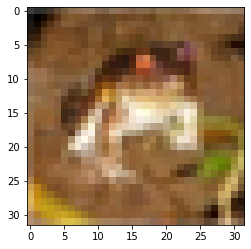

In [3]:
# Lets look at one of the images and its label
print(y_train[0])
plt.imshow(x_train[0])

In [4]:
classes = 10

y_train = keras.utils.np_utils.to_categorical(y_train, classes)
y_test = keras.utils.np_utils.to_categorical(y_test, classes)

In [5]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
# Making everything to be float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Conv2D

```python
keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
```
When using this layer as the first layer in a model, provide the keyword argument input_shape

- `filters`: Integer, the number of output filters in the convolution.
- `kernel_size`: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `activation`: Activation function to use. If you don't specify anything, no activation is applied.


Note, the size of the output will be determined by the kernel_size, strides

### MaxPooling2D
```python
keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)
```

- `pool_size`: Integer or tuple of 2 integers, factors by which to downscale (vertical, horizontal).
- `strides`: Integer, tuple of 2 integers, or None. Strides values.

### Flatten
```python
keras.layers.Flatten(data_format=None)
```
Turns its input into a one-dimensional vector (per instance). Usually used when transitioning between convolutional layers and fully connected layers.

### Activation
```python
keras.layers.Activation(activation)
```

Applies an activation function to the output

### Sequential
The Sequential model is a linear stack of layers. You can create a Sequential model by passing a list of layer instances to the constructor



In [7]:

model_1 = Sequential()


model_1.add(Conv2D(64, (4, 4), strides = (2,2), padding='same', input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (4, 4), strides = (2,2)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.3))
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 64)        3136      
_________________________________________________________________
activation (Activation)      (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          65600     
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [8]:
opt = keras.optimizers.Adam(lr=0.0005, decay=1e-6)
model_1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model_1.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/10
391/391 [==============================] - 18s 9ms/step - loss: 1.9741 - accuracy: 0.2683 - val_loss: 1.4881 - val_accuracy: 0.4642
Epoch 2/10
391/391 [==============================] - 2s 6ms/step - loss: 1.5204 - accuracy: 0.4478 - val_loss: 1.3326 - val_accuracy: 0.5272
Epoch 3/10
391/391 [==============================] - 3s 6ms/step - loss: 1.3815 - accuracy: 0.5008 - val_loss: 1.2355 - val_accuracy: 0.5642
Epoch 4/10
391/391 [==============================] - 2s 6ms/step - loss: 1.3126 - accuracy: 0.5334 - val_loss: 1.2025 - val_accuracy: 0.5738
Epoch 5/10
391/391 [==============================] - 2s 6ms/step - loss: 1.2415 - accuracy: 0.5546 - val_loss: 1.1367 - val_accuracy: 0.5945
Epoch 6/10
391/391 [==============================] - 2s 6ms/step - loss: 1.1885 - accuracy: 0.5761 - val_loss: 1.1152 - val_accuracy: 0.6063
Epoch 7/10
391/391 [==============================] - 2s 6ms/step - loss: 1.1520 - accuracy: 0.5925 - val_loss: 1.0784 - val_accuracy: 0.6223
Epoch

In [9]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9976716637611389
Test accuracy: 0.652400016784668


In [10]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-d', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-d', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-d', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-d', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

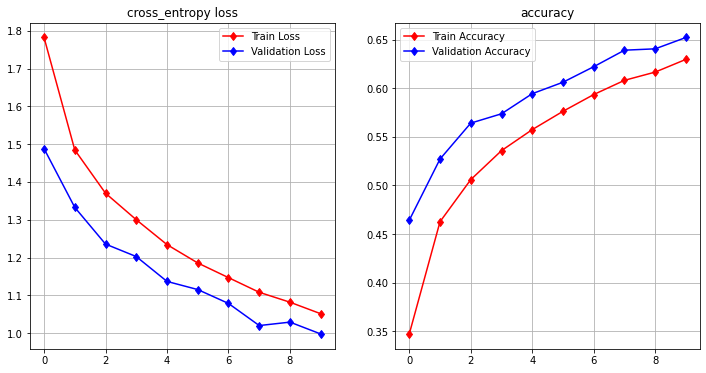

In [11]:
plot_loss_accuracy(history)

### Exercise
Our previous model had the structure:

Conv -> Conv -> MaxPool -> Flatten -> Dense -> Final Classification

(with appropriate activation functions and dropouts)

1. Build a more complicated model with the following pattern:
- Conv -> Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> Flatten -> Dense -> Dense -> Final Classification

- Use strides of 1 for all convolutional layers.

2. How many parameters does your model have

In [12]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images
                   
history = datagen.fit(x_train)      
# This computes any statistics that may be needed (e.g. for centering) from the training set.

    
# Fit the model on the batches generated by datagen.flow().
model_1.fit_generator(datagen.flow(x_train, y_train,batch_size=128), steps_per_epoch=x_train.shape[0] // 128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
390/390 [==============================] - 22s 57ms/step - loss: 1.4486 - accuracy: 0.4771 - val_loss: 1.0886 - val_accuracy: 0.6226
Epoch 2/10
390/390 [==============================] - 23s 58ms/step - loss: 1.3655 - accuracy: 0.5105 - val_loss: 1.0873 - val_accuracy: 0.6189
Epoch 3/10
390/390 [==============================] - 22s 57ms/step - loss: 1.3345 - accuracy: 0.5238 - val_loss: 1.0926 - val_accuracy: 0.6185
Epoch 4/10
390/390 [==============================] - 22s 56ms/step - loss: 1.3137 - accuracy: 0.5318 - val_loss: 1.1199 - val_accuracy: 0.6094
Epoch 5/10
390/390 [==============================] - 22s 57ms/step - loss: 1.2877 - accuracy: 0.5395 - val_loss: 1.0662 - val_accuracy: 0.6263
Epoch 6/10
390/390 [==============================] - 23s 58ms/step - loss: 1.2721 - accuracy: 0.5453 - val_loss: 1.0824 - val_accuracy: 0.6152
Epoch 7/10
390/390 [==============================] - 22s 56ms/step - loss: 1.2590 - accuracy: 0.5486 - val_loss: 1.0338 - val_accuracy:

In [13]:
print(history)

None


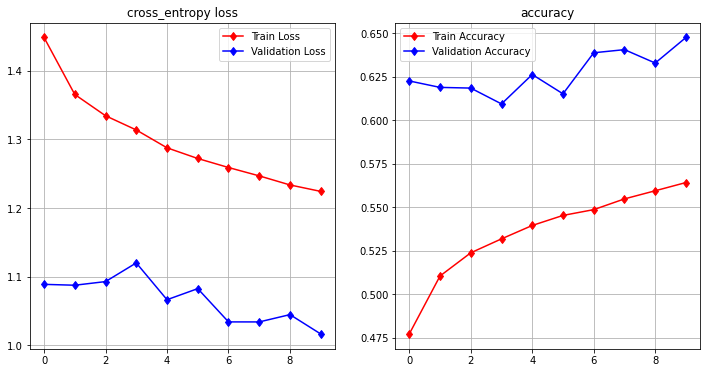

In [14]:
plot_loss_accuracy(model_1.history)